# **At first, Import all the necessary library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

**Load the dataset**
> We take the dataset from Kaggle. This data set name is **framingham-heart-study-dataset**

In [2]:
df = pd.read_csv('/kaggle/input/framingham-heart-study-dataset/framingham.csv')

**Show the dataset table**

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Check any missing value or not**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

**Now, try to fill-up the missing value**

<Axes: >

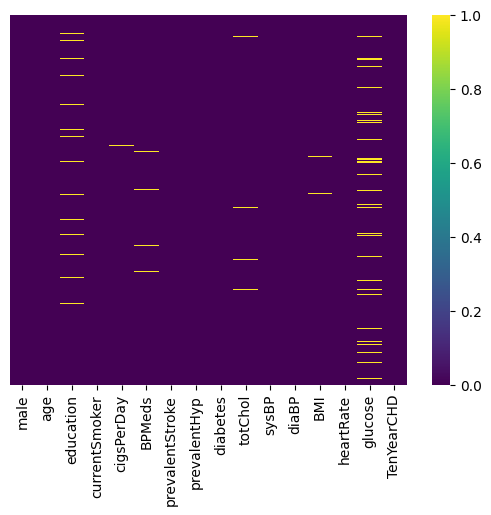

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

In [7]:
updated_df = df
updated_df['cigsPerDay']=updated_df['cigsPerDay'].fillna(updated_df['cigsPerDay'].mean())
updated_df['education']=updated_df['education'].fillna(updated_df['education'].mean())
updated_df['BPMeds']=updated_df['BPMeds'].fillna(updated_df['BPMeds'].mean())
updated_df['totChol']=updated_df['totChol'].fillna(updated_df['totChol'].mean())
updated_df['BMI']=updated_df['BMI'].fillna(updated_df['BMI'].mean())
updated_df['heartRate']=updated_df['heartRate'].fillna(updated_df['heartRate'].mean())
updated_df['glucose']=updated_df['glucose'].fillna(updated_df['glucose'].mean())

In [8]:
updated_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<Axes: >

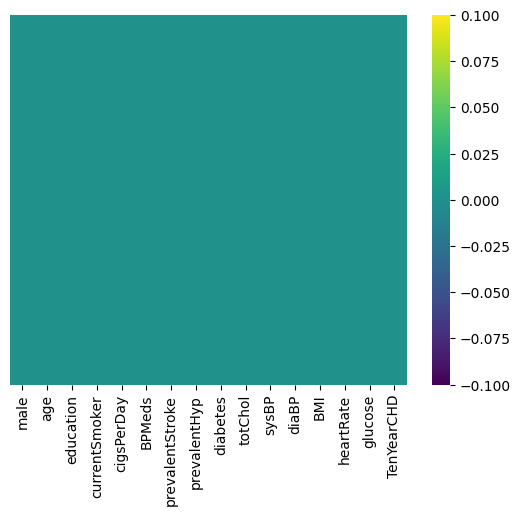

In [9]:
sns.heatmap(updated_df.isnull(), yticklabels=False, cmap="viridis")

**Heatmap to finding strong corelation and weak corelation**

<Axes: >

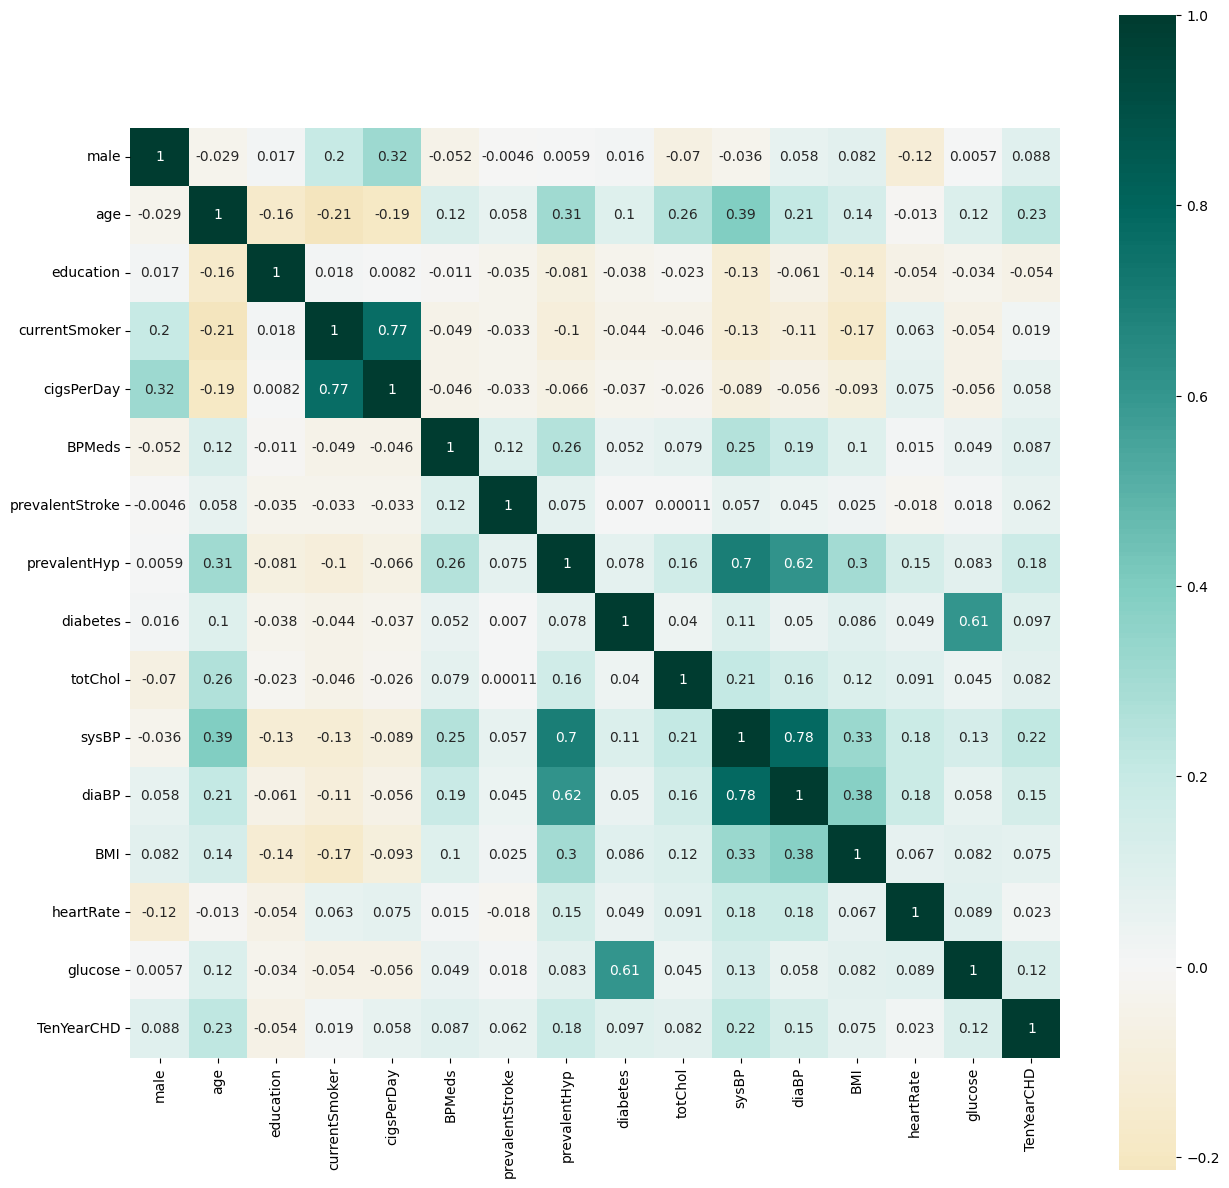

In [10]:
corr_matrix=updated_df.corr()
plt.figure(1, figsize=(15,15))
sns.heatmap(corr_matrix, cmap='BrBG', center=0, annot=True, square=True)


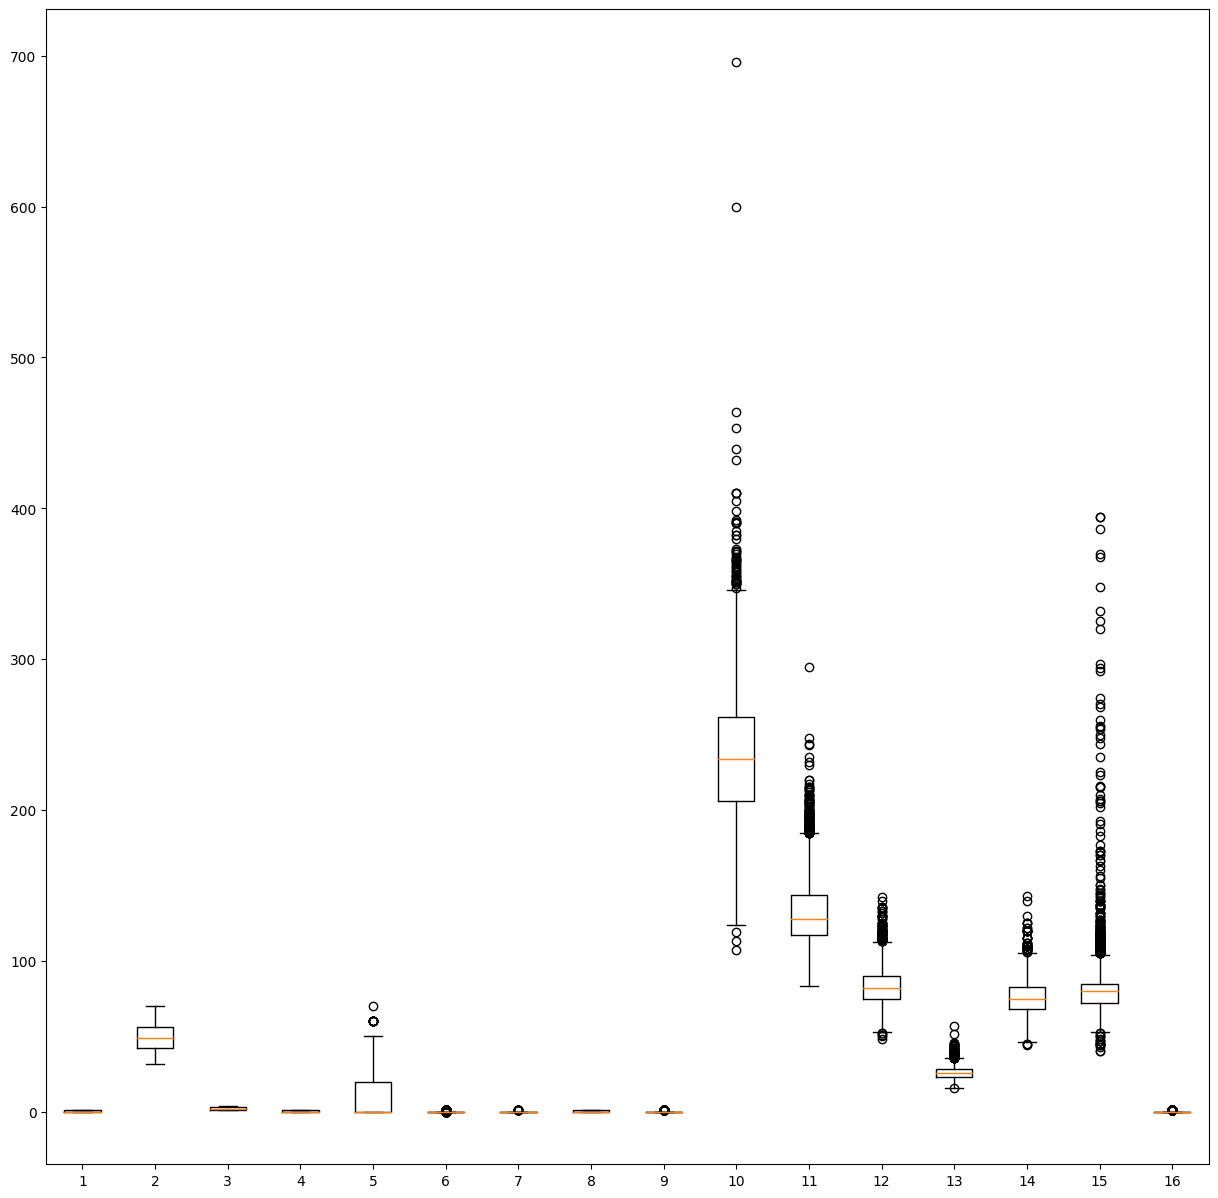

In [11]:
# boxplot
plt.figure(figsize = (15, 15))
plt.boxplot(updated_df)
plt.show()

**Visualize different types of Bar plot**

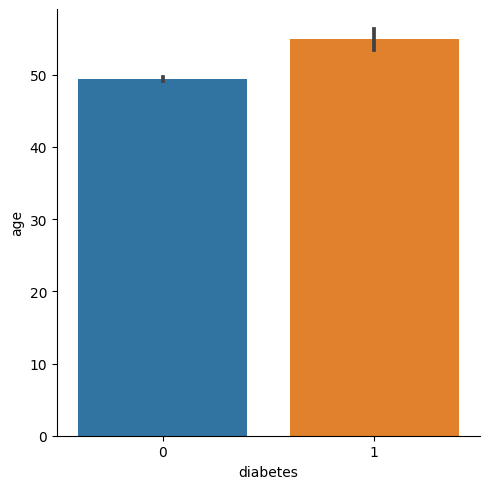

In [12]:
sns.catplot(x="diabetes", y="age", kind="bar", data = updated_df)

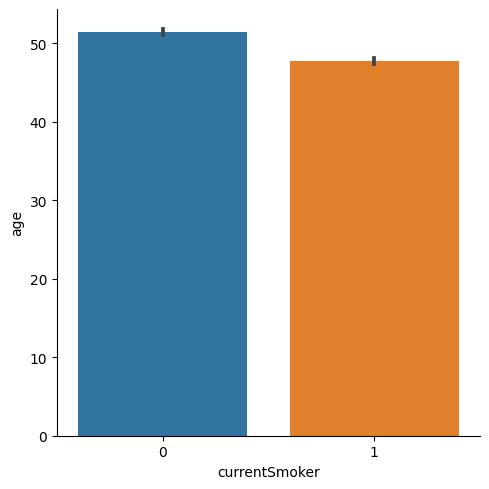

In [13]:
sns.catplot(x="currentSmoker", y="age", kind="bar", data = updated_df)

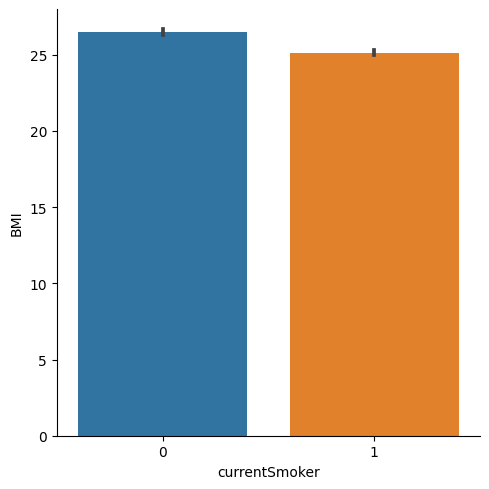

In [14]:
sns.catplot(x="currentSmoker", y="BMI", kind="bar", data = updated_df)

**Visualize joint plot**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


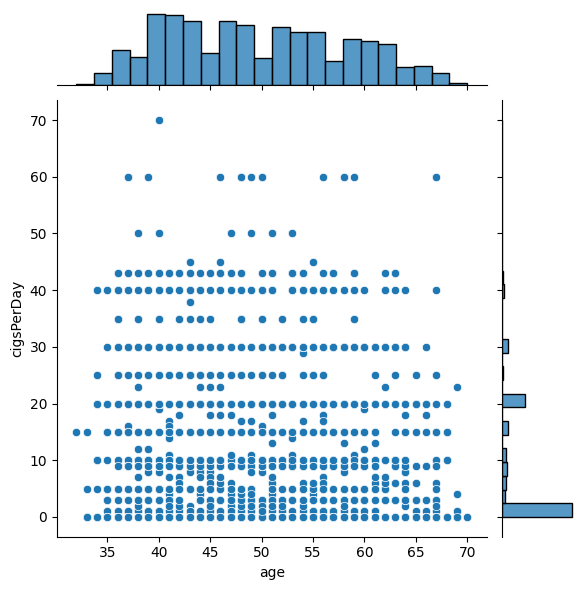

In [15]:
sns.jointplot(x="age", y="cigsPerDay", data=updated_df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


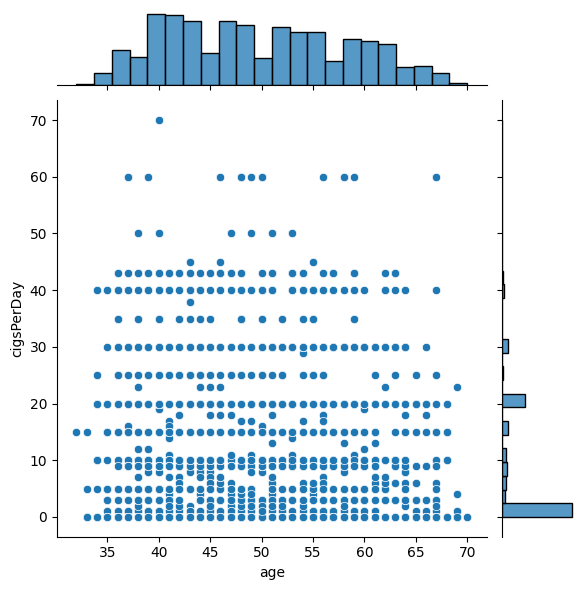

In [16]:
sns.jointplot(x="age", y="cigsPerDay", data=updated_df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


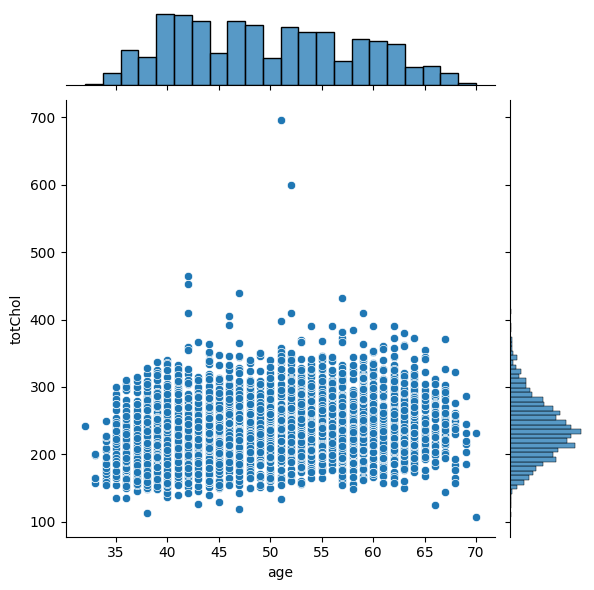

In [17]:
sns.jointplot(x="age", y="totChol", data=updated_df)

**Visualize count plot**

<Axes: xlabel='TenYearCHD', ylabel='count'>

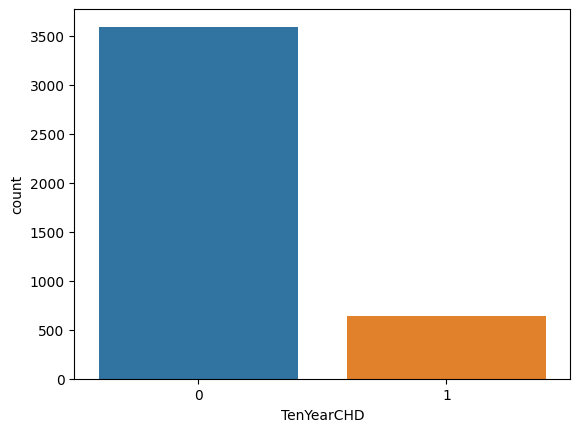

In [18]:
sns.countplot(x="TenYearCHD", data=updated_df)

<Axes: xlabel='prevalentHyp', ylabel='count'>

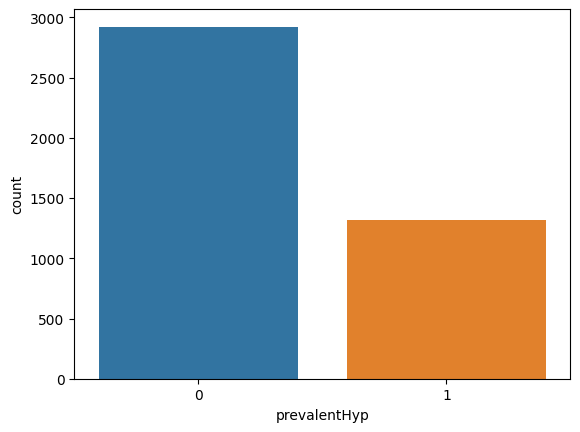

In [19]:
sns.countplot(x="prevalentHyp", data=updated_df)

<Axes: ylabel='Frequency'>

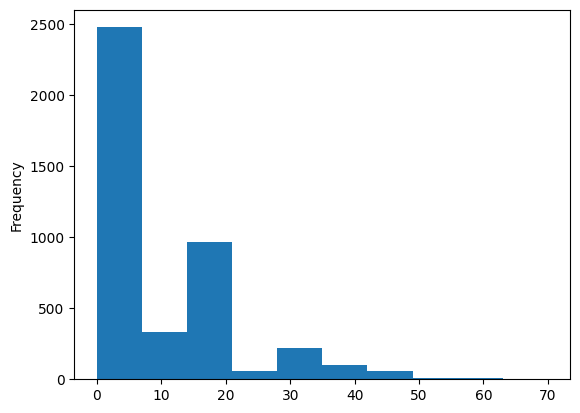

In [20]:
updated_df["cigsPerDay"].plot.hist()

<Axes: ylabel='Frequency'>

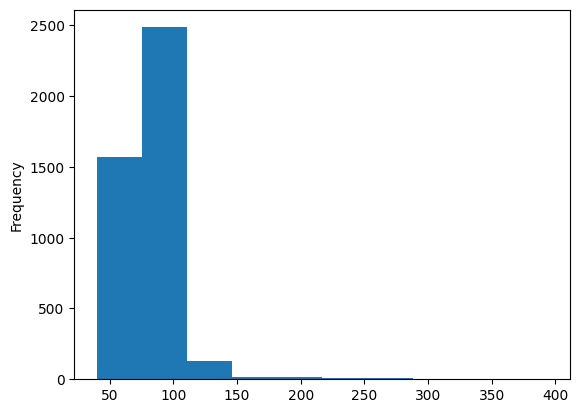

In [21]:
updated_df["glucose"].plot.hist()

<Axes: ylabel='Frequency'>

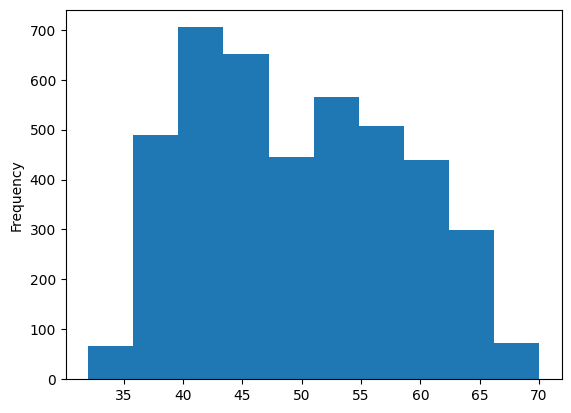

In [22]:
updated_df["age"].plot.hist()

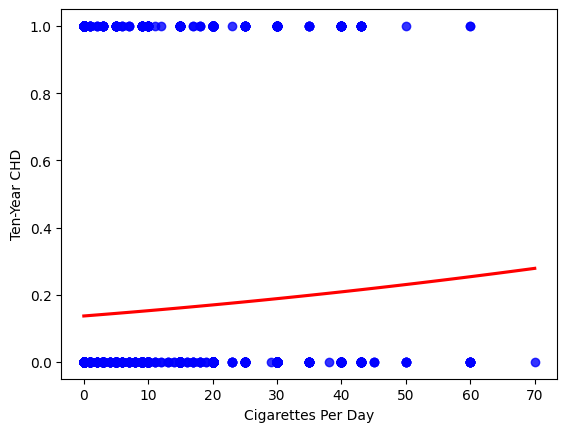

In [23]:
cig = updated_df[['cigsPerDay', 'TenYearCHD']]

sns.regplot(x='cigsPerDay', y='TenYearCHD', data=cig, logistic=True, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Cigarettes Per Day')
plt.ylabel('Ten-Year CHD')
plt.show()

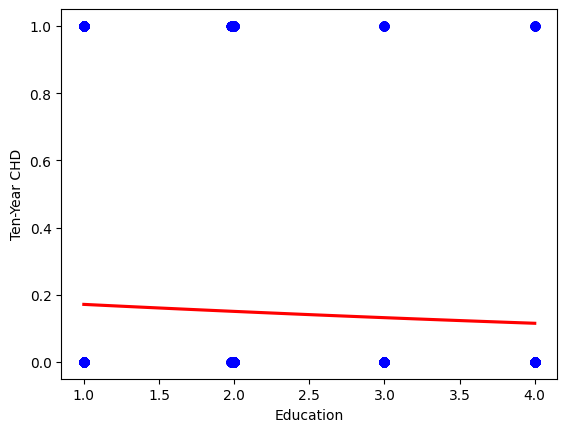

In [24]:
cig = updated_df[['education', 'TenYearCHD']]

sns.regplot(x='education', y='TenYearCHD', data=cig, logistic=True, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Education')
plt.ylabel('Ten-Year CHD')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

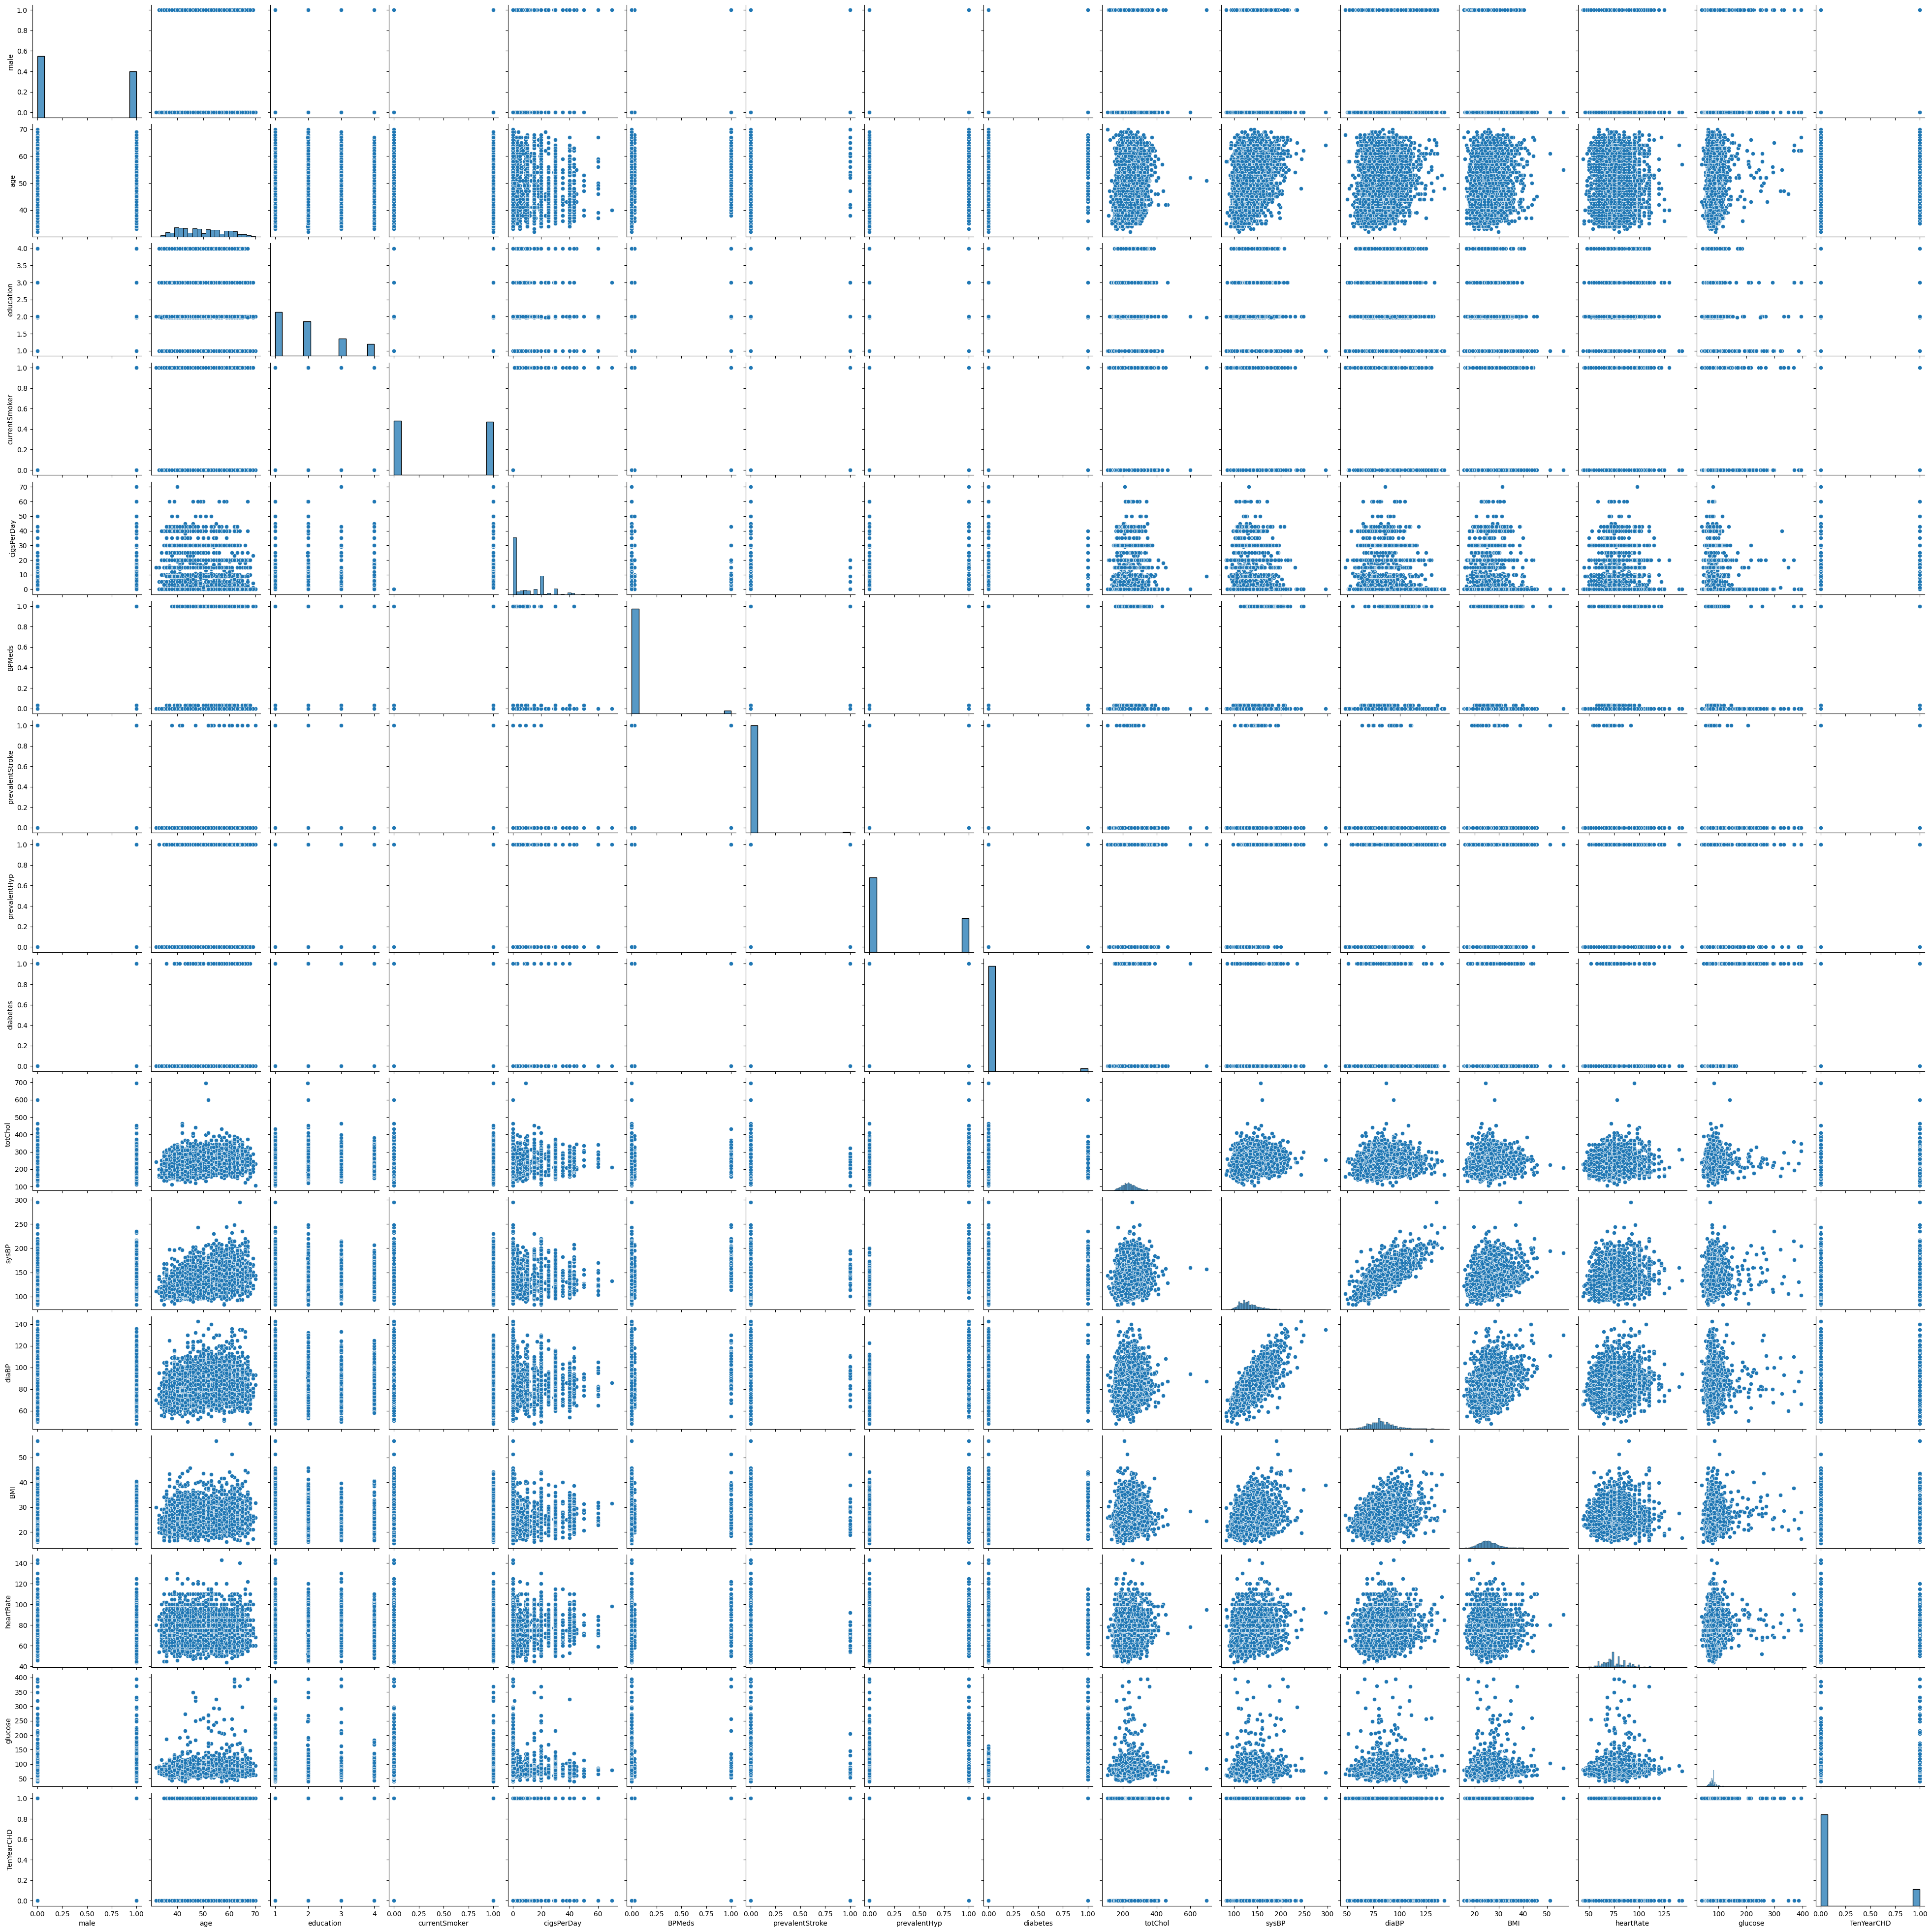

In [25]:
sns.pairplot(updated_df)

Now we drop our education column

In [26]:
updated_df.drop("education", axis=1, inplace=True)
updated_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# **Now, Apply Logistic Regression Algorithm**

> **Fixed the Target variable, Here the Target variable is TenYearCHD**

In [27]:
x = updated_df.drop(columns=['TenYearCHD'])
y = updated_df['TenYearCHD']

In [28]:
# split the dataset into training and testing 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

> **Initialize and train the Logistic Regression model**

In [29]:
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict test set
y_pred = model.predict(x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


> **Calculate Evaluation matrix**

In [30]:
accuracy_log = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [31]:
print(f"Accuracy Score: {accuracy_log}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F1 Score: {f1}")

# confusion matrix
print('\nConfusion matrix for Logistic:')
print(confusion_matrix(y_test,y_pred))

Accuracy Score: 0.8608490566037735
Precision Score: 0.7777777777777778
Recall Score: 0.056910569105691054
F1 Score: 0.10606060606060606

Confusion matrix for Logistic:
[[723   2]
 [116   7]]


# **Now for K-Nearest Neighbors (KNN)**

> **Train the KNN model**

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(x_train, y_train)

# Predict test set for KNN
y_pred_knn = knn_model.predict(x_test)

> **Calculate Accuracy Result for KNN**

In [33]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print(f"Accuracy Score: {accuracy_knn}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F1 Score: {f1}")

# confusion matrix
print('\nConfusion matrix for KNN:')
print(confusion_matrix(y_test,y_pred_knn))

Accuracy Score: 0.8502358490566038
Precision Score: 0.35714285714285715
Recall Score: 0.04065040650406504
F1 Score: 0.072992700729927

Confusion matrix for KNN:
[[716   9]
 [118   5]]


> Compare the accuracy using a graph

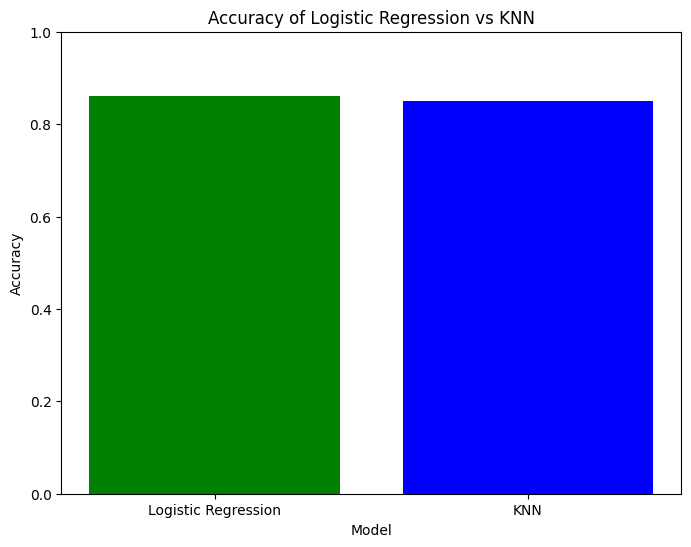

In [34]:
models = ['Logistic Regression', 'KNN']
accuracies = [accuracy_log, accuracy_knn]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['green', 'blue'])
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression vs KNN')
plt.show()